# Visualize Data Using Annotations and Metadata

In [1]:
# install packages
import yaml
import os
import json
import torch
from torch.utils.data import Dataset
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from pycocotools.coco import COCO
import pandas as pd

In [3]:
# grab annotations
annotations_path = ('/home/Alexandra/Projects/bodycondition/sharkbody_seg/notebooks/data_splitting/merged_coco.json')
df = get_mask_dims(annotations_path)

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [4]:
# grab metadata
metadata_path = ('/mnt/class_data/group2/alexandradigiacomo/dataset/metadata/sharklengths_metadata.csv')
df_meta = pd.read_csv(metadata_path)

In [9]:
# join up metadata
df_join = pd.merge(df, df_meta, on=['FileName'], how='left')

df_join[['img_height', 'img_width']].drop_duplicates()


,img_height,img_width
0,2160,3840
4,3078,5472
30,1530,2688
503,3648,4864
513,1080,1920
1061,2160,4096


Plot distributions

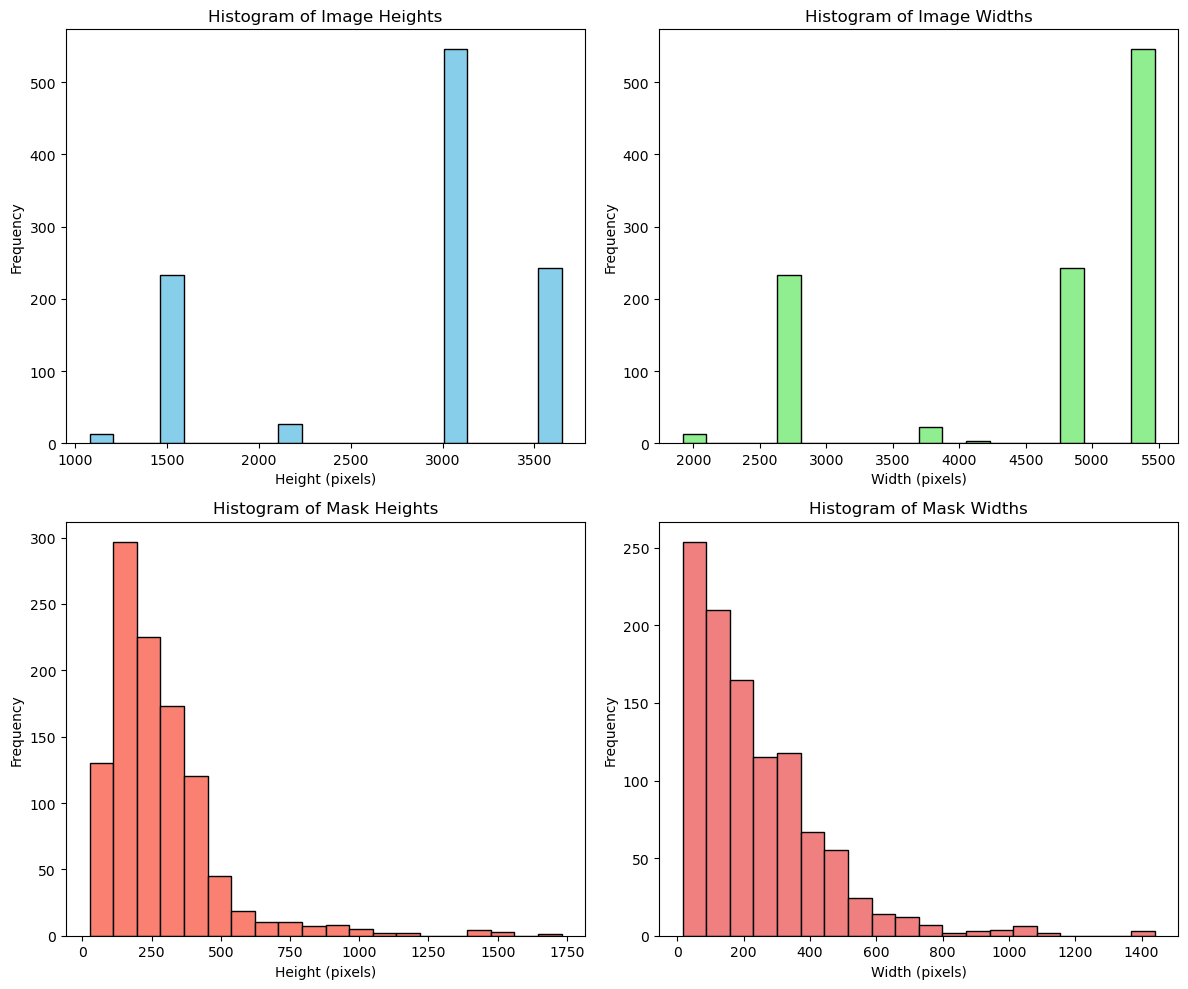

In [5]:
# create histograms for image and mask dimensions
plt.figure(figsize=(12, 10))

# Plot histogram for image height
plt.subplot(2, 2, 1)
plt.hist(df['img_height'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Image Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

# Plot histogram for image width
plt.subplot(2, 2, 2)
plt.hist(df['img_width'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Histogram of Image Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

# Plot histogram for mask height
plt.subplot(2, 2, 3)
plt.hist(df['mask_height'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogram of Mask Heights')
plt.xlabel('Height (pixels)')
plt.ylabel('Frequency')

# Plot histogram for mask width
plt.subplot(2, 2, 4)
plt.hist(df['mask_width'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Histogram of Mask Widths')
plt.xlabel('Width (pixels)')
plt.ylabel('Frequency')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [49]:
df_join.columns

Index(['FileName', 'img_height', 'img_width', 'mask_height', 'mask_width',
       'Unnamed: 0', 'Label', 'TL_Pixels', 'White.Shark.ID', 'Nickname',
       'TrueLength_ft', 'VisualLength_Ft', 'LateralSpan_Pixels',
       'FrontalSpan_Pixels', 'ProximalSpan_Pixels', 'DateTimeOriginal',
       'ImageWidth', 'ImageHeight', 'CameraPitch', 'RelativeAltitude',
       'AbsoluteAltitude', 'GPSLatitude', 'GPSLongitude', 'aircraft', 'site',
       'type', 'flight', 'GSD_cm', 'Uncalibrated_Length_cm',
       'Flight_Transformation', 'Calibrated_Length_cm', 'VisualLength_ft',
       'calibration_Altitude', 'Calibrated_FS_cm', 'Calibrated_PS_cm',
       'Calibrated_LS_cm'],
      dtype='object')

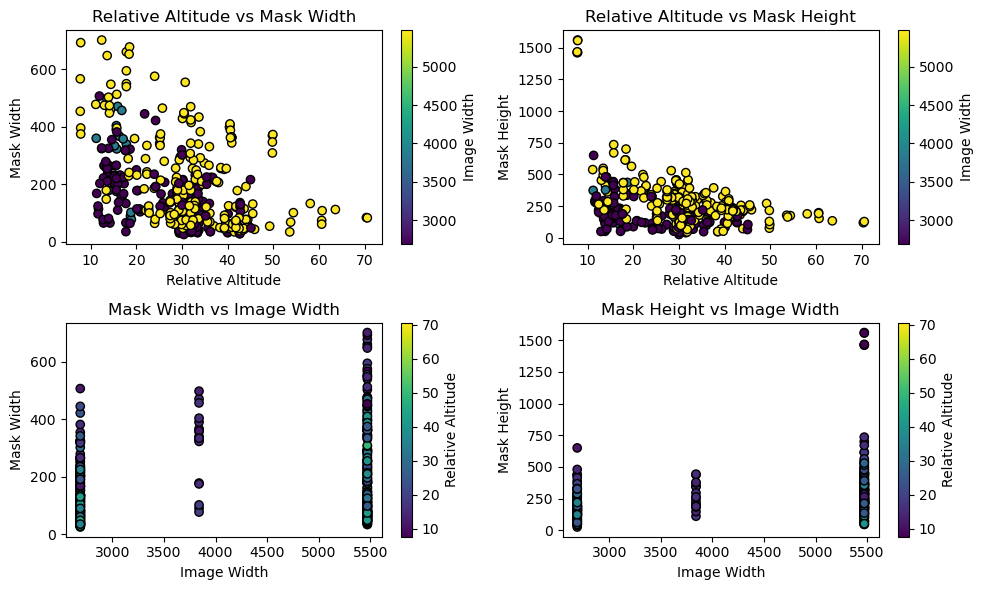

In [56]:
# plot mask sizes in relation to image size and relative altitude
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
scatter1 = plt.scatter(df_join['RelativeAltitude'], df_join['mask_width'], c=df_join['img_width'], cmap='viridis', edgecolors='k')
plt.title("Relative Altitude vs Mask Width")
plt.xlabel("Relative Altitude")
plt.ylabel("Mask Width")
plt.colorbar(scatter1, label='Image Width')

plt.subplot(2, 2, 2)
scatter2 = plt.scatter(df_join['RelativeAltitude'], df_join['mask_height'], c=df_join['img_width'], cmap='viridis', edgecolors='k')
plt.title("Relative Altitude vs Mask Height")
plt.xlabel("Relative Altitude")
plt.ylabel("Mask Height")
plt.colorbar(scatter2, label='Image Width')

plt.subplot(2, 2, 3)
scatter3 = plt.scatter(df_join['img_width'], df_join['mask_width'], c=df_join['RelativeAltitude'], cmap='viridis', edgecolors='k')
plt.title("Mask Width vs Image Width")
plt.xlabel("Image Width")
plt.ylabel("Mask Width")
plt.colorbar(scatter3, label='Relative Altitude')

plt.subplot(2, 2, 4)
scatter4 = plt.scatter(df_join['img_width'], df_join['mask_height'], c=df_join['RelativeAltitude'], cmap='viridis', edgecolors='k')
plt.title("Mask Height vs Image Width")
plt.xlabel("Image Width")
plt.ylabel("Mask Height")
plt.colorbar(scatter4, label='Relative Altitude')

plt.tight_layout()
plt.show()
